In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scikitplot as skplt

In [76]:
pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)



In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv(r"C:/Users/Shivani/Downloads/creditcard.csv")

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# distribution of legit transactions & fraudulent transactions

credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
#This Dataset is highly unblanced

#0 --> Normal Transaction

#1 --> fraudulent transaction

In [7]:
# separating the data for analysis

valid = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [8]:
print(valid.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
# statistical measures of the data
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
#Building a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

#Number of Fraudulent Transactions --> 492

valid_sample=valid.sample(n=492)

In [12]:
#combining both dataframes
new_dataset= pd.concat([valid_sample,fraud],axis=0)

In [13]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
126070,77918.0,-0.275721,0.319724,1.906474,0.040642,-0.423895,0.334107,0.004601,0.260538,-1.474237,...,-0.468350,-0.737404,0.023673,0.166098,-0.182781,-0.568387,0.104621,0.026754,5.00,0
56233,47327.0,-1.015092,0.772264,1.626198,0.059031,0.576953,-0.916144,0.735748,-0.061660,-0.807258,...,0.188640,0.437999,-0.311102,0.549629,0.244163,-0.512462,-0.028978,0.107305,13.43,0
181854,125146.0,1.894628,-1.666562,-0.825716,-1.194279,-0.708951,1.013076,-1.324448,0.265279,0.187581,...,0.277407,0.454594,-0.018584,-0.677859,-0.324453,-0.239450,-0.001046,-0.024518,168.40,0
57764,48062.0,1.410097,-0.223516,-0.637684,-1.896355,0.229311,-0.221126,-0.037752,-0.082615,0.931381,...,-0.245115,-0.623377,-0.196071,-1.353733,0.644293,-0.035829,-0.013237,-0.013362,4.31,0
50779,44647.0,1.309106,0.133725,-0.371831,-0.306146,0.345669,-0.306975,0.270347,-0.149087,-0.377745,...,-0.449376,-1.372697,0.027461,-0.805961,0.248506,0.673002,-0.103797,-0.013726,23.38,0


In [14]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [15]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95766.871951,-0.204714,-0.122429,0.009209,-0.190091,0.031835,-0.035406,0.071190,0.058503,-0.040215,...,0.007697,-0.053210,-0.009770,0.006487,0.001169,0.011211,-0.002271,0.005383,0.024764,103.480346
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [17]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
126070   77918.0 -0.275721  0.319724  1.906474  0.040642 -0.423895  0.334107   
56233    47327.0 -1.015092  0.772264  1.626198  0.059031  0.576953 -0.916144   
181854  125146.0  1.894628 -1.666562 -0.825716 -1.194279 -0.708951  1.013076   
57764    48062.0  1.410097 -0.223516 -0.637684 -1.896355  0.229311 -0.221126   
50779    44647.0  1.309106  0.133725 -0.371831 -0.306146  0.345669 -0.306975   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [18]:
print(Y)

126070    0
56233     0
181854    0
57764     0
50779     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [19]:
#Split the data into Training data & Testing Data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=3)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [21]:
print(Y.shape, Y_train.shape, Y_test.shape)

(984,) (787,) (197,)


In [48]:
#Model Training

#Logistic Regression

model=LogisticRegression(solver='lbfgs', max_iter=120)

In [49]:
# training the Logistic Regression Model with Training Data

model.fit(X_train,Y_train)



LogisticRegression(max_iter=120)

In [50]:
yPred = model.predict(X_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

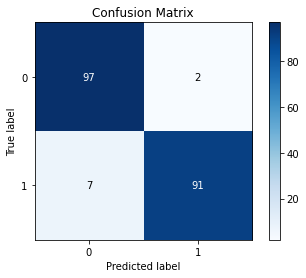

In [51]:
#conf_matrix = confusion_matrix(Y_test, yPred)
skplt.metrics.plot_confusion_matrix(Y_test, yPred)

In [52]:
print (classification_report(Y_test, yPred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        99
           1       0.98      0.93      0.95        98

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



In [53]:
accuracy_score(Y_test, yPred)

0.9543147208121827